# CNN


In [1]:
# TODO
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16880400703810595304
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 14856594137603826176
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10029688416162908393
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15856546612
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12409525626211923903
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [2]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from sklearn.preprocessing import LabelEncoder

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tensorflow.keras.backend as K
K.clear_session()

In [5]:
nrow = 150
ncol = 150

In [6]:
input_shape=(nrow,ncol,3)
base_model = applications.VGG16(weights='imagenet',input_shape=input_shape,include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model = Sequential()
for layer in base_model.layers:
    model.add(layer)

In [8]:
for layer in model.layers:
    layer.trainable=False

In [9]:
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       295168    
__________

In [11]:
train_data_dir = './train'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='categorical')

Found 3000 images belonging to 3 classes.


In [12]:
test_data_dir = './test'
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='categorical')

Found 900 images belonging to 3 classes.


In [13]:
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

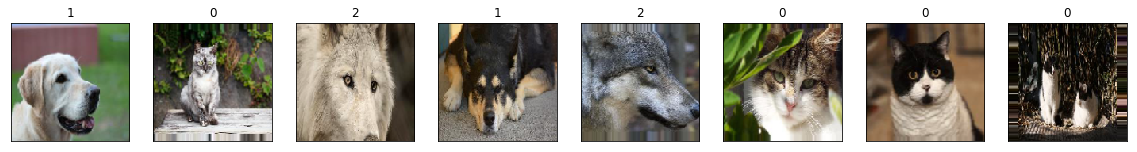

In [14]:

Xtr,ytr=train_generator.next()
n=8
plt.figure(figsize=(20,20))
for i in range(n):
    plt.subplot(1,n,i+1)
    disp_image(Xtr[i])
    #plt.title(int(ytr[i]))
    plt.title(np.where(ytr[i]==1)[0][0])
    
#0--cat
#1--dog
#2--wolf


In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
steps_per_epoch =  train_generator.n // batch_size
validation_steps = test_generator.n // batch_size


In [17]:
nepochs = 5  # Number of epochs

# Call the fit_generator function
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=nepochs,
    validation_data=test_generator,
    validation_steps=validation_steps)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
94/94 [==============================] - 44s 470ms/step - loss: 0.9298 - acc: 0.6583 - val_loss: 0.4731 - val_acc: 0.8222
Epoch 2/5
94/94 [==============================] - 28s 298ms/step - loss: 0.5126 - acc: 0.7960 - val_loss: 0.4077 - val_acc: 0.8500
Epoch 3/5
94/94 [==============================] - 28s 294ms/step - loss: 0.4573 - acc: 0.8200 - val_loss: 0.3985 - val_acc: 0.8544
Epoch 4/5
94/94 [==============================] - 28s 296ms/step - loss: 0.4159 - acc: 0.8427 - val_loss: 0.3741 - val_acc: 0.8444
Epoch 5/5
94/94 [==============================] - 28s 294ms/step - loss: 0.3830 - acc: 0.8550 - val_loss: 0.3701 - val_acc: 0.8533


Training accuracy and validation accuracy

Text(0, 0.5, 'accuracy')

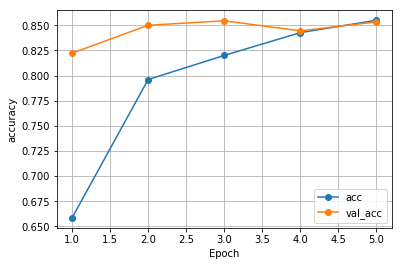

In [18]:
acc=hist.history['acc']
val_acc=hist.history['val_acc']
n=len(acc)
plt.plot(np.arange(1,n+1),acc,'o-')
plt.plot(np.arange(1,n+1),val_acc,'o-')
plt.legend(['acc','val_acc'])
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('accuracy')

 There are some images that were in error 

In [22]:
n_error=4
X_err=[]
y_err=[]
yhat_err=[]
err=[]
yts2=[]
n=0
while(n<n_error):
    Xts,yts=test_generator.next()
    for j in range(yts.shape[0]):
        yts2.append(np.where(yts[j]==1)[0][0])
    z=model.predict(Xts)
    yhat=np.argmax(z,axis=1)
    err=np.where(yhat!=yts2)[0]
    for i in err:
            n+=1
            X_err.append(Xts[i])
            y_err.append(yts2[i])
            yhat_err.append(yhat[i])
            print('................')

................
................
................
................


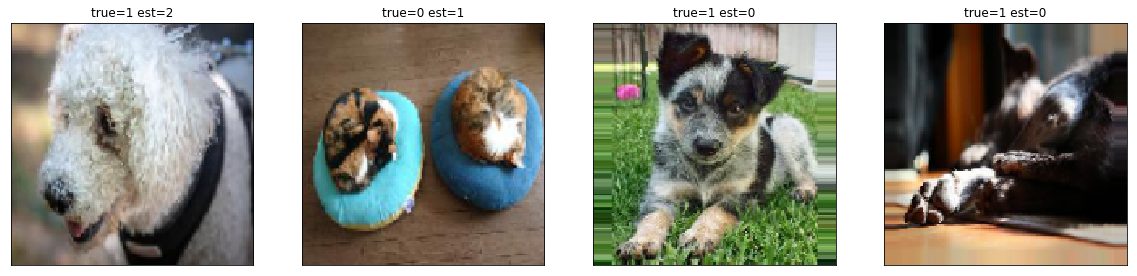

In [23]:
plt.figure(figsize=(20,20))
for i in range(n_error):
    plt.subplot(1,n_error,i+1)
    disp_image(X_err[i])
    title='true={0:d} est={1:d}'.format(int(y_err[i]),int(yhat_err[i]))
    plt.title(title)
#0--cat
#1--dog
#2--wolf